<a href="https://colab.research.google.com/github/Kaizensk/Book-Recommender-System/blob/main/ShwetaKumari_Book_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'blue'><b> Book Recommender System


<font color = 'blue'> During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).

<font color = 'blue'> Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

In [20]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
#importing libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [22]:
import seaborn as sns

# <font color = 'blue'><b> About Dataset

<font color = 'blue'> The Book-Crossing dataset comprises 3 files.

<font color = 'blue'>● Users

<font color = 'blue'>Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

<font color = 'blue'>● Books

<font color = 'blue'>Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

<font color = 'blue'>● Ratings


<font color = 'blue'>Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [23]:
# Read the books.csv data
pathBooks = "/content/drive/MyDrive/AlmaBetter/Capstone_Project/Capstone III/data_book_recommendation/Books.csv"
dfbooks = pd.read_csv(pathBooks)
#df1 = pd.DataFrame(df)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
# Read the Ratings.csv data
pathRatings = "/content/drive/MyDrive/AlmaBetter/Capstone_Project/Capstone III/data_book_recommendation/Ratings.csv"
dfratings = pd.read_csv(pathRatings)
#df1 = pd.DataFrame(df)

In [25]:
# Read the Users.csv data
pathUsers = "/content/drive/MyDrive/AlmaBetter/Capstone_Project/Capstone III/data_book_recommendation/Users.csv"
dfusers = pd.read_csv(pathUsers)
#df1 = pd.DataFrame(df)

In [26]:
dfbooks.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [27]:
dfbooks.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [28]:
dfbooks.shape

(271360, 8)

In [29]:
dfbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [30]:
dfbooks.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [31]:
dfbooks.loc[dfbooks['Year-Of-Publication'] == 'DK Publishing Inc', :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [32]:
dfbooks.loc[dfbooks.ISBN == '0789466953','Year-Of-Publication'] = 2000
dfbooks.loc[dfbooks.ISBN == '0789466953','Book-Author'] = "James Buckley"
dfbooks.loc[dfbooks.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
dfbooks.loc[dfbooks.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"

In [33]:
dfbooks.loc[dfbooks.ISBN == '078946697X','Year-Of-Publication'] = 2000
dfbooks.loc[dfbooks.ISBN == '078946697X','Book-Author'] = "JMichael Teitelbaum"
dfbooks.loc[dfbooks.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
dfbooks.loc[dfbooks.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"

In [34]:
dfbooks.loc[dfbooks['Year-Of-Publication'] == 'Gallimard', :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [35]:
dfbooks.loc[dfbooks.ISBN == '2070426769','Year-Of-Publication'] = 2003
dfbooks.loc[dfbooks.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
dfbooks.loc[dfbooks.ISBN == '2070426769','Publisher'] = "Gallimard"
dfbooks.loc[dfbooks.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de Les Bergers"

In [36]:
dfbooks['Year-Of-Publication'] = pd.to_numeric(dfbooks['Year-Of-Publication'], errors = 'coerce')

In [37]:
print(sorted(dfbooks['Year-Of-Publication'].unique()))


[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [38]:
#sns.distplot(dfbooks['Year-Of-Publication'], kde=False, hist_kws={"range": [1945,2020]})

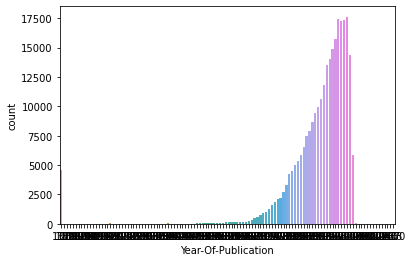

In [39]:
sns.countplot(x="Year-Of-Publication", data=dfbooks)

In [40]:
dfbooks.loc[(dfbooks['Year-Of-Publication'] > 2006) | (dfbooks['Year-Of-Publication'] == 0), 'Year-Of-Publication'] = np.NAN
dfbooks['Year-Of-Publication'].fillna(round(dfbooks['Year-Of-Publication'].median()), inplace = True)

In [41]:
dfbooks['Year-Of-Publication'] = dfbooks['Year-Of-Publication'].astype(np.int32)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


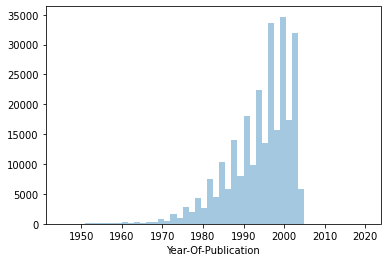

In [42]:
# Publication by Year
#year = pd.to_numeric(dfbooks['Year-Of-Publication'], 'coerse').fillna(2099, downcast = 'infer')
sns.distplot(dfbooks['Year-Of-Publication'], kde=False, hist_kws={"range": [1945,2020]})

In [43]:
dfbooks.loc[dfbooks.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [44]:
dfbooks.loc[(dfbooks.ISBN == '193169656X'), 'Publisher'] = 'other'
dfbooks.loc[(dfbooks.ISBN == '1931696993'), 'Publisher'] = 'other'

In [45]:
dfbooks.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

In [46]:
dfbooks.loc[dfbooks.ISBN == '9627982032','Book-Author'] = "David Tait"

In [47]:
dfbooks.loc[dfbooks.ISBN == '193169656X','Publisher'] = "Novelbooks Inc"
dfbooks.loc[dfbooks.ISBN == '1931696993','Publisher'] = "Bantam"

In [48]:
dfbooks.shape

(271360, 5)

In [49]:
dfbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  int32 
 4   Publisher            271360 non-null  object
dtypes: int32(1), object(4)
memory usage: 9.3+ MB


In [50]:
dfratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [51]:
dfratings.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


In [52]:
dfratings.shape

(1149780, 3)

In [53]:
dfratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [54]:
dfratings.duplicated().sum()

0

<font color = 'blue'> We do not have any null values for the ratings data

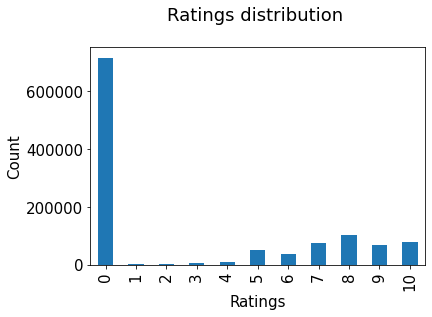

In [55]:
plt.rc("font", size=15)
dfratings['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Ratings distribution \n')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [56]:
unique_ratings = dfratings[dfratings.ISBN.isin(dfbooks.ISBN)]

In [57]:
ratings_explicit= unique_ratings[unique_ratings['Book-Rating'] != 0]
ratings_implicit= unique_ratings[unique_ratings['Book-Rating'] == 0]

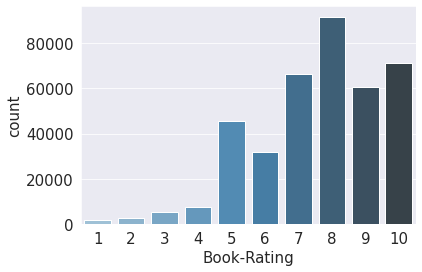

In [58]:
sns.set_style('darkgrid')
sns.countplot(data= ratings_explicit , x='Book-Rating', palette="Blues_d")
plt.show()

In [59]:
dfratings.shape

(1149780, 3)

In [60]:
unique_ratings.shape

(1031136, 3)

In [61]:
ratings_implicit.shape

(647294, 3)

In [62]:
ratings_explicit.shape

(383842, 3)

In [63]:
dfratings_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
dfratings_count.sort_values('Book-Rating', ascending = False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


In [64]:
avg_rating= pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].mean())
avg_rating['ratingCount'] = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
avg_rating.sort_values('ratingCount', ascending= False).head()

,Book-Rating,ratingCount
ISBN,,
0316666343,8.185290,707
0971880107,4.390706,581
0385504209,8.435318,487
0312195516,8.182768,383
0060928336,7.887500,320


In [65]:
user_rating_count= pd.DataFrame(ratings_explicit['User-ID'].value_counts())

In [66]:
user_rating_count

,User-ID
11676,6943
98391,5691
189835,1899
153662,1845
23902,1180
...,...
148684,1
124088,1
105655,1
103606,1


# <font color = 'blue'> Users data

In [67]:
dfusers.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [68]:
dfusers.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [69]:
dfusers.shape

(278858, 3)

In [70]:
dfusers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [71]:
dfusers.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [72]:
dfusers.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

<font color = 'blue'> We have 110762 null values in Age column for Users data

In [73]:
print(sorted(dfusers.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

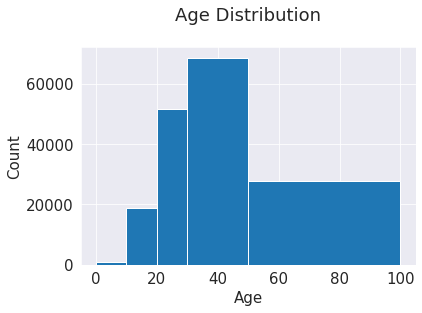

In [74]:
dfusers.Age.hist(bins=[0,10,20,30,50,100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


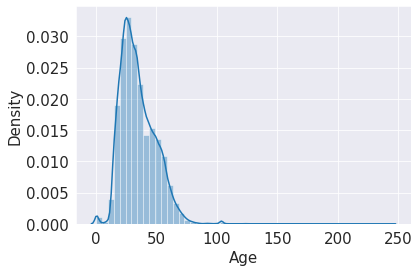

In [75]:
sns.distplot(dfusers['Age'].dropna())

In [76]:
dfusers[['City','State','Country']] = dfusers.Location.str.split(",",expand=True,n=2)

In [77]:
dfusers.drop(['Location','City','State'],axis=1,inplace=True)

In [78]:
dfusers['Country'].unique()

array([' usa', ' russia', ' portugal', ..., ' la svizzera', ' hernando',
       ' united kingdom.'], dtype=object)

In [79]:
dfusers.nunique()

User-ID    278858
Age           165
Country      1276
dtype: int64

In [80]:
dfusers.isnull().sum()

User-ID         0
Age        110762
Country         2
dtype: int64

In [81]:
dfusers['Country']=dfusers['Country'].astype('str')

In [82]:
dfusers.loc[(dfusers.Age > 90) | (dfusers.Age < 5), 'Age'] = np.nan

In [83]:
dfusers = dfusers[dfusers['Country'].notna()]

In [84]:
dfusers['Age'] = dfusers['Age'].fillna(dfusers.groupby('Country')['Age'].transform('median'))

In [85]:
dfusers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User-ID  278858 non-null  int64  
 1   Age      278319 non-null  float64
 2   Country  278858 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 8.5+ MB


In [86]:
dfusers.isna().sum()

User-ID      0
Age        539
Country      0
dtype: int64

In [87]:
dfusers['Age'].fillna(dfusers.Age.mean(),inplace=True)

In [88]:
dfusers.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

In [89]:
len(dfbooks["Book-Title"].unique())

242135

In [90]:
len(dfbooks["Book-Author"].unique())

102023

In [91]:
len(dfbooks["Publisher"].unique())

16805

In [92]:
len(dfratings["User-ID"].unique())

105283

In [93]:
len(dfratings["ISBN"].unique())

340556

In [94]:
len(dfratings["Book-Rating"].unique())

11

In [95]:
dfratings['User-ID'].nunique()

105283

In [96]:
dfusers['User-ID'].nunique()

278858

In [97]:
dfbooks['ISBN'].nunique()

271360

#<font color = 'blue'> Popularity based

<font color = 'blue'> Most rated

In [98]:
ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['Book-Rating'].sum())
top10 = ratings_count.sort_values('Book-Rating', ascending = False).head(10)
print("Following books are recommended")
top10=top10.merge(dfbooks, left_index = True, right_on = 'ISBN')
top10['Book-Title']

Following books are recommended


408                             The Lovely Bones: A Novel
748                                     The Da Vinci Code
522                   The Red Tent (Bestselling Backlist)
2143    Harry Potter and the Sorcerer's Stone (Harry P...
356                               The Secret Life of Bees
26                                            Wild Animus
1105      Divine Secrets of the Ya-Ya Sisterhood: A Novel
706     Where the Heart Is (Oprah's Book Club (Paperba...
231                             Girl with a Pearl Earring
118                                   Angels &amp; Demons
Name: Book-Title, dtype: object

#CF 

In [99]:
counts1 = ratings_explicit['User-ID'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['User-ID'].isin(counts1[counts1 >= 100].index)]
counts = ratings_explicit['Book-Rating'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['Book-Rating'].isin(counts[counts >= 100].index)]

In [100]:
#Generating ratings matrix from explicit ratings table
ratings_matrix = ratings_explicit.pivot(index='User-ID', columns='ISBN', values='Book-Rating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()
#Notice that most of the values are NaN (undefined) implying absence of ratings

(449, 66574)


ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,0001056107,0001845039,0001935968,0001944711,0001952803,0001953877,0002000547,0002005018,0002005050,0002005557,0002006588,0002115328,0002116286,0002118580,0002154900,0002158973,0002163713,0002176181,0002176432,0002179695,0002181924,0002184974,0002190915,0002197154,0002223929,0002228394,000223257X,0002233509,0002239183,0002240114,...,987960170X,9974643058,999058284X,9992003766,9992059958,9993584185,9994256963,9994348337,9997405137,9997406567,9997406990,999740923X,9997409728,9997411757,9997411870,9997412044,9997412958,9997507002,999750805X,9997508769,9997512952,9997519086,9997555635,9998914140,B00001U0CP,B00005TZWI,B00006CRTE,B00006I4OX,B00007FYKW,B00008RWPV,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:

n_users = ratings_matrix.shape[0] #considering only those users who gave explicit ratings
n_books = ratings_matrix.shape[1]
print (n_users, n_books)

449 66574


In [102]:
ratings_matrix.fillna(0, inplace = True)
ratings_matrix = ratings_matrix.astype(np.int32)

In [103]:
#checking first few rows
ratings_matrix.head(5)

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,0001056107,0001845039,0001935968,0001944711,0001952803,0001953877,0002000547,0002005018,0002005050,0002005557,0002006588,0002115328,0002116286,0002118580,0002154900,0002158973,0002163713,0002176181,0002176432,0002179695,0002181924,0002184974,0002190915,0002197154,0002223929,0002228394,000223257X,0002233509,0002239183,0002240114,...,987960170X,9974643058,999058284X,9992003766,9992059958,9993584185,9994256963,9994348337,9997405137,9997406567,9997406990,999740923X,9997409728,9997411757,9997411870,9997412044,9997412958,9997507002,999750805X,9997508769,9997512952,9997519086,9997555635,9998914140,B00001U0CP,B00005TZWI,B00006CRTE,B00006I4OX,B00007FYKW,B00008RWPV,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
users_exp_ratings = dfusers[dfusers['User-ID'].isin(ratings_explicit['User-ID'])]
users_imp_ratings = dfusers[dfusers['User-ID'].isin(ratings_implicit['User-ID'])]

In [105]:
sparsity = 1.0-len(ratings_explicit)/float(users_exp_ratings.shape[0]*n_books)

In [106]:
users_interactions_count_df = ratings_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 5].reset_index()[['User-ID']]
print('# of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

# of users: 449
# of users with at least 5 interactions: 449


In [107]:
print('# of interactions: %d' % len(ratings_explicit))
interactions_from_selected_users_df = ratings_explicit.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 103271
# of interactions from users with at least 5 interactions: 103271


In [108]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating
0,2033,0030020786,7
1,2033,0060248025,10
2,2033,0060256664,10
3,2033,0060256737,10
4,2033,0060950536,10
5,2033,0061020419,7
6,2033,0061020427,6
7,2033,0061056278,10
8,2033,0061056286,8
9,2033,0061056294,9


In [109]:
import math

In [110]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 103271


,ISBN,User-ID,Book-Rating
0,0000913154,171118,3.169925
1,0001046438,23902,3.321928
2,000104687X,23902,2.807355
3,0001047213,23902,3.321928
4,0001047973,23902,3.321928


In [111]:
from sklearn.model_selection import train_test_split

In [112]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 82616
# interactions on Test set: 20655


In [113]:
interactions_test_df.head()

,ISBN,User-ID,Book-Rating
87596,0879051213,95010,3.000000
52630,0515101230,129074,3.000000
68434,0679427724,75819,3.169925
85835,0843951346,135149,3.321928
92752,1551665727,158295,3.169925


In [114]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0000913154,000104687X,0001047973,000104799X,0001048082,0001053736,0001055607,0001056107,0001845039,0001935968,0001944711,0001953877,0002000547,0002005018,0002005050,0002005557,0002006588,0002115328,0002116286,0002118580,0002154900,0002158973,0002163713,0002176181,0002176432,0002179695,0002181924,0002184974,0002190915,0002197154,0002223929,0002228394,000223257X,0002239183,0002240114,0002241358,0002244098,0002245728,000225056X,0002250810,...,9813056096,9813056606,9814120383,9837407875,9838120014,9871106173,9871138148,9879397274,9974643058,999058284X,9992059958,9993584185,9997405137,9997406567,9997406990,999740923X,9997409728,9997411757,9997411870,9997412044,9997412958,9997507002,999750805X,9997508769,9997512952,9997519086,9997555635,B00001U0CP,B00005TZWI,B00006CRTE,B00007FYKW,B00008RWPV,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [116]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575]

In [117]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [118]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [119]:
users_items_pivot_matrix.shape

(449, 55734)

In [120]:
U.shape

(449, 15)

In [121]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [122]:
Vt.shape

(15, 55734)

In [123]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 4.88550541e-03,  2.85971611e-03,  3.38388681e-03, ...,
         1.42013223e-04,  3.54079515e-04,  7.47768905e-03],
       [-7.18981417e-04, -8.50242379e-04, -1.00608727e-03, ...,
         9.56415201e-05,  1.97131524e-04,  4.70357968e-03],
       [ 4.20625317e-03, -1.63794830e-03, -1.93817548e-03, ...,
         1.47160380e-04,  3.15909212e-04,  6.62829028e-03],
       ...,
       [ 4.21283796e-03,  1.86101942e-03,  2.20213435e-03, ...,
         2.48492914e-04,  4.61193093e-04,  7.80653269e-03],
       [ 1.14220835e-02, -2.09370075e-03, -2.47746493e-03, ...,
         3.32924986e-04,  6.47171181e-04,  1.17120919e-02],
       [-1.45777630e-03,  5.15857348e-03,  6.10411246e-03, ...,
         8.40473244e-05,  1.43564965e-04,  2.90875718e-03]])

In [124]:
all_user_predicted_ratings.shape

(449, 55734)

In [125]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,7286,7346,8067,8245,8681,8890,10560,11676,11993,12538,12824,12982,13552,13850,14422,15408,15418,16634,16795,16966,17950,19085,21014,23768,23872,23902,25409,25601,25981,26535,...,250405,250709,251394,251843,251844,252695,252820,254206,254465,254899,255489,257204,258152,258185,258534,261105,261829,262998,264031,264082,264321,264525,265115,265313,265889,266056,266226,268110,268300,268932,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000913154,0.004886,-0.000719,0.004206,0.002586,-0.002029,-0.004439,-0.002568,-0.001622,0.012336,0.012440,-0.000036,0.020801,-0.006192,0.000217,-0.004521,6.587178e-07,0.014785,-0.001146,0.007836,0.002469,0.002544,-0.006557,-0.021389,0.008860,-0.003788,0.010179,-0.000308,0.057308,0.010837,0.019089,-0.000041,0.002000,-0.005202,0.005793,0.015353,-0.002866,-0.000007,-0.000730,-0.008041,-0.000858,...,0.010832,-0.001066,0.003005,-0.001346,0.012947,0.019152,0.012120,0.005252,-0.011702,0.022681,0.003727,0.107423,0.009250,-0.006155,-0.011704,-0.001022,-0.013587,0.011365,0.000176,-0.005597,0.042305,-0.004583,-0.001942,0.006416,-0.004481,0.000574,0.003648,0.002266,-0.001779,0.008122,0.000370,0.003048,-0.001865,0.007390,-0.012149,0.001364,0.007262,0.004213,0.011422,-0.001458
000104687X,0.002860,-0.000850,-0.001638,0.017317,-0.000638,0.007906,0.016946,0.007421,-0.002611,0.011799,-0.000103,0.002206,-0.000335,0.001219,0.005474,1.509013e-05,-0.002098,-0.001768,-0.000761,-0.002012,-0.001147,0.005941,-0.001787,-0.000949,0.003760,0.003107,0.001310,-0.001898,-0.004376,-0.000775,0.002543,-0.001543,0.017307,0.003901,-0.000719,2.799734,0.001348,-0.000358,-0.002991,-0.000466,...,-0.000289,-0.000504,0.002083,0.003741,0.007938,-0.003464,-0.001474,0.004007,-0.006216,-0.000979,-0.000041,-0.009945,-0.000866,0.000965,0.005268,-0.000413,0.001587,0.013312,-0.000498,0.001149,0.000044,0.002122,0.003415,-0.002180,-0.004359,0.001663,0.014331,0.003928,-0.000491,0.005620,-0.002400,0.013498,-0.001222,0.020421,-0.004888,-0.006188,0.015481,0.001861,-0.002094,0.005159
0001047973,0.003384,-0.001006,-0.001938,0.020491,-0.000755,0.009355,0.020052,0.008782,-0.003090,0.013962,-0.000122,0.002611,-0.000396,0.001443,0.006478,1.785607e-05,-0.002483,-0.002092,-0.000900,-0.002381,-0.001357,0.007030,-0.002115,-0.001123,0.004449,0.003676,0.001550,-0.002245,-0.005178,-0.000917,0.003009,-0.001826,0.020479,0.004616,-0.000851,3.312910,0.001595,-0.000424,-0.003539,-0.000551,...,-0.000342,-0.000597,0.002465,0.004426,0.009394,-0.004099,-0.001744,0.004742,-0.007355,-0.001158,-0.000049,-0.011767,-0.001025,0.001142,0.006234,-0.000489,0.001878,0.015752,-0.000589,0.001360,0.000053,0.002511,0.004041,-0.002580,-0.005158,0.001968,0.016958,0.004649,-0.000581,0.006650,-0.002840,0.015972,-0.001446,0.024164,-0.005783,-0.007322,0.018319,0.002202,-0.002477,0.006104
000104799X,0.000618,0.000416,0.000696,0.001787,0.000222,0.001382,0.001349,0.002549,0.001657,0.004394,0.000075,0.004723,0.001453,0.001680,0.001042,-4.909936e-06,0.001371,0.001030,0.000656,0.001111,0.000685,0.001201,0.003647,0.000903,0.001324,0.000539,0.000460,0.002754,0.020108,0.000267,0.001904,0.000632,0.003723,0.001559,0.003970,-0.001373,0.001468,0.000283,0.002342,0.000140,...,0.000168,0.000227,0.000863,0.001674,0.001344,0.001477,0.000850,0.001566,0.002857,0.000549,0.002307,0.002163,0.000577,0.000661,0.004896,0.000209,0.003086,0.000126,0.001650,0.001054,0.001524,0.001168,0.001963,0.001102,0.001648,0.001076,0.000671,0.001546,0.001886,0.000794,0.001316,0.002166,0.002655,0.001071,0.001620,0.002258,0.002142,0.000887,0.001367,0.000304
0001048082,0.003229,-0.000960,-0.001849,0.019553,-0.000720,0.008927,0.019135,0.008380,-0.002948,0.013323,-0.000116,0.002491,-0.000378,0.001377,0.006181,1.703902e-05,-0.002369,-0.001997,-0.000859,-0.002272,-0.001295,0.006709,-0.002018,-0.001072,0.004245,0.003508,0.001479,-0.002143,-0.004941,-0.000875,0.002872,-0.001743,0.019542,0.0

In [126]:
len(cf_preds_df.columns)

449

In [127]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)

        return recommendations_df


cf_recommender_model = CFRecommender(cf_preds_df)

In [128]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [129]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [183]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_recs_df,person_metrics       #person_recs_df extra

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_recs_df, person_metrics = self.evaluate_model_for_user(model, person_id)      #person_recs_dfextra
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return person_recs_df, global_metrics, detailed_results_df    #person_recs_df extra
    
model_evaluator = ModelEvaluator()    

In [131]:
import random

In [132]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
448 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.17458242556281772, 'recall@10': 0.22967804405712902}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,User-ID
10,178,242,1389,0.128150,0.174226,11676
31,139,181,1138,0.122144,0.159051,98391
45,16,20,380,0.042105,0.052632,189835
30,63,86,369,0.170732,0.233062,153662
70,22,29,236,0.093220,0.122881,23902
7,23,28,204,0.112745,0.137255,235105
47,17,26,203,0.083744,0.128079,76499
50,17,20,193,0.088083,0.103627,171118
42,45,56,192,0.234375,0.291667,16795
43,15,19,188,0.079787,0.101064,248718


In [184]:
#person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
person_recs_df, cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)


Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
448 users processed


In [189]:
person_recs_df.shape

(55653, 2)

In [191]:
person_recs_df=pd.DataFrame(person_recs_df)

In [193]:
person_recs_df[0:10]

,ISBN,recStrength
0,0316666343,0.303687
1,0312195516,0.226822
2,0312966970,0.176321
3,0345370775,0.170434
4,059035342X,0.163479
5,0312980140,0.160652
6,0440214041,0.157770
7,0440211727,0.155150
8,0446310786,0.154694
9,0671001795,0.152922


In [133]:
#ratingsPivot= dfratings.pivot(index = 'User-ID', columns= 'ISBN').Book-Rating
#UserId= ratingsPivot.index
#ISBN = ratingsPivot.columns
#print(ratingsPivot.shape)
#ratingsPivot.head()

In [134]:
new_book_df= pd.merge(dfbooks, ratings_explicit, on='ISBN')
new_book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,110912,10
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,197659,9
3,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676,9
4,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,46398,9


In [136]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(new_book_df, test_size=0.20)

In [137]:
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set lengths: 82616
Testing set lengths: 20655
Test set is 20% of the full dataset.


In [138]:
# Get int mapping for user_id in train dataset

u_unique_train = train_data['User-ID'].unique()  
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}

# Get int mapping for isbn in train dataset

i_unique_train = train_data.ISBN.unique()  
train_data_book2idx = {o:i for i, o in enumerate(i_unique_train)}

# Get int mapping for user_id in test dataset

u_unique_test = test_data['User-ID'].unique()  
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}

# Get int mapping for isbn in train dataset

i_unique_test = test_data.ISBN.unique() 
test_data_book2idx = {o:i for i, o in enumerate(i_unique_test)}

In [140]:
# TRAINING SET
train_data['u_unique'] = train_data['User-ID'].map(train_data_user2idx)
train_data['i_unique'] = train_data['ISBN'].map(train_data_book2idx)

# TESTING SET
test_data['u_unique'] = test_data['User-ID'].map(test_data_user2idx)
test_data['i_unique'] = test_data['ISBN'].map(test_data_book2idx)

# Convert back to 3-column df
train_data = train_data[['u_unique', 'i_unique', 'Book-Rating']]
test_data = test_data[['u_unique', 'i_unique', 'Book-Rating']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [141]:
train_data.sample(5)

,u_unique,i_unique,Book-Rating
69303,347,29065,7
21010,29,19380,9
32772,328,39921,10
101625,37,30819,7
98398,131,27007,7


In [142]:
n_users = train_data['u_unique'].nunique()
n_books = train_data['i_unique'].nunique()

train_matrix = np.zeros((n_users, n_books))

for entry in train_data.itertuples():                  # entry[1] is the user-id, entry[2] is the book-isbn
    train_matrix[entry[1]-1, entry[2]-1] = entry[3]    # -1 is to counter 0-based indexing

In [143]:
train_matrix.shape

(449, 55807)

In [144]:
n_users = test_data['u_unique'].nunique()
n_books = test_data['i_unique'].nunique()

test_matrix = np.zeros((n_users, n_books))

for entry in test_data.itertuples():
    test_matrix[entry[1]-1, entry[2]-1] = entry[3]

In [145]:
test_matrix.shape

(449, 17468)

In [146]:
train_matrix_small = train_matrix[:5000, :5000]
test_matrix_small = test_matrix[:5000, :5000]

from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine')

In [147]:
def predict_books(ratings, similarity, type='user'): # default type is 'user'
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        
        # Use np.newaxis so that mean_user_rating has the same format as ratings
        
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [148]:
item_prediction = predict_books(train_matrix_small, item_similarity, type='item')
user_prediction = predict_books(train_matrix_small, user_similarity, type='user')

In [149]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, test_matrix):
    prediction = prediction[test_matrix.nonzero()].flatten()
    test_matrix = test_matrix[test_matrix.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, test_matrix))

print(f'Item-based CF RMSE: {rmse(item_prediction, test_matrix_small)}')
print(f'User-based CF RMSE: {rmse(user_prediction, test_matrix_small)}')

Item-based CF RMSE: 8.058554185431856
User-based CF RMSE: 8.057548587191071


In [154]:
pip install surprise

     |████████████████████████████████| 11.8MB 5.5MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617631 sha256=307891353022e605e7c1ce977eb9e3e5f1ca8764f9a6aefa1a669687eb5c6964
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [155]:
from surprise import Reader, Dataset

# Creating a 'Reader' object to set the limit of the ratings 

reader = Reader(rating_scale=(1, 10))

data = Dataset.load_from_df(ratings_explicit, reader)

In [156]:
from surprise import SVD, model_selection, accuracy

model = SVD()

# Train on books dataset

%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4974  1.4980  1.4916  1.5183  1.5028  1.5016  0.0091  
Fit time          5.80    5.88    5.81    5.88    5.81    5.83    0.04    
Test time         0.19    0.35    0.31    0.19    0.19    0.24    0.07    
CPU times: user 32.1 s, sys: 161 ms, total: 32.3 s
Wall time: 32.2 s


{'fit_time': (5.7995078563690186,
  5.877234935760498,
  5.810626745223999,
  5.876640796661377,
  5.806864976882935),
 'test_rmse': array([1.49742582, 1.49801716, 1.49155308, 1.51832918, 1.50282188]),
 'test_time': (0.18685460090637207,
  0.3514258861541748,
  0.31084394454956055,
  0.18730640411376953,
  0.1885218620300293)}

In [157]:
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

model = SVD()

model.fit(trainset)
predictions = model.test(testset)

accuracy.rmse(predictions)

RMSE: 1.4890


1.4890304533002565

In [158]:
uid = 276744  
iid = '038550120X' 
pred = model.predict(uid, iid, verbose=True)

user: 276744     item: 038550120X r_ui = None   est = 7.97   {'was_impossible': False}


In [168]:
 #ratings_explicit[(ratings_explicit['User-ID']==pred.uid) & (ratings_explicit.ISBN==pred.iid)]['Book-Rating']

In [169]:
print(f'The estimated rating for the book with ISBN code {pred.iid} from user #{pred.uid} is {pred.est:.2f}.\n')
#actual_rtg= ratings_explicit[(ratings_explicit['User-ID']==pred.uid) & 
#                             (ratings_explicit.ISBN==pred.iid)]['Book-Rating'].values[0]
#print(f'The real rating given for this was {actual_rtg:.2f}.')

The estimated rating for the book with ISBN code 038550120X from user #276744 is 7.97.



In [170]:
# The following function was adapted from the surprise docs
# and can be used to get the top book recommendations for each user.
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        
    return top_n

In [171]:
pred = model.test(testset)
top_n = get_top_n(pred)

In [178]:
def get_reading_list(userid):
    """
    Retrieve full book titles from full 'books_users_ratings' dataframe
    """
    reading_list = defaultdict(list)
    top_n = get_top_n(pred, n=10)
    for n in top_n[userid]:
        book, rating = n
        title = new_book_df.loc[new_book_df.ISBN==book]['Book-Title'].unique()[0]
        reading_list[title] = rating
    return reading_list

In [179]:
# Just take a random look at user_id=60337    116866
example_reading_list = get_reading_list(userid=60337)
for book, rating in example_reading_list.items():
    print(f'{book}: {rating}')

In Search of Our Mothers' Gardens: Womanist Prose: 8.789778138569595
Tea Time/Tradition, Presentation, and Recipes (Running Press Miniature Editions): 8.757697521336059
The Doctor's Book of Home Remedies : Thousands of Tips and Techniques Anyone Can Use to Heal Everyday Health Problems: 8.706412198315624
No Exit and Three Other Plays: 8.632987727308144
Shoes: A Celebration of Pumps, Sandals, Slippers &amp; More: 8.624570001315673
Plays Well With Others (Vintage Contemporaries): 8.623328165880029
Care of the Soul : A Guide for Cultivating Depth and Sacredness in Everyday Life: 8.608297043514883
If Beale Street Could Talk: 8.605048598373871
The Life I Lead: A Novel: 8.605048598373871
The Vagabond: 8.605048598373871
